In [1]:
import numpy as np
import h5py as h5
import astropy.units as u
import matplotlib.pyplot as plt

import gala.potential as gp

import cogsworth
import pynbody

# Test new code

In [2]:
snap = cogsworth.hydro.utils.prepare_snapshot("../../data/snapshot_600.hdf5")

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:555: RuntimeWarning: No unit information found in GadgetHDF file. Using gadget default units.
  warnings.warn("No unit information found in GadgetHDF file. Using gadget default units.", RuntimeWarning)
/home/tom/Documents/research/cogsworth/cogsworth/hydro/utils.py:38: UserWarning: No halo catalogue found, using pynbody's built-in halo finder to centre the snapshot
  warnings.warn("No halo catalogue found, using pynbody's built-in halo finder to centre the snapshot")
/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:394: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


In [ ]:
pot = cogsworth.hydro.potential.get_snapshot_potential(snap, out_path="m11h.yml", verbose=True)

In [5]:
%%time
try:
    pot = gp.load("m11h.yml")
except:
    pot = cogsworth.hydro.potential.get_snapshot_potential(snap, out_path="m11h.yml", verbose=True)

CPU times: user 200 ms, sys: 3.56 ms, total: 204 ms
Wall time: 203 ms


In [3]:
subsnap = snap.s[(snap.properties["time"] - snap.s["tform"]).in_units("Myr") < 5]

In [6]:
star_particles = cogsworth.hydro.rewind.rewind_to_formation(subsnap, pot, processes=6)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 334.88it/s]
/home/tom/Documents/research/cogsworth/cogsworth/hydro/rewind.py:67: UserWarning: Formation masses (`massform`) not found, using present day masses instead
  warnings.warn("Formation masses (`massform`) not found, using present day masses instead")


In [7]:
pop = cogsworth.hydro.pop.HydroPopulation(star_particles, subset=1, max_ev_time=snap.properties["time"].in_units("Myr") * u.Myr,
                                          sampling_params={"sampling_target": "total_mass", "trim_extra_samples": True, "keep_singles": True},
                                          snapshot_type="FIRE")

In [10]:
pop.create_population()

Run for 10485 binaries
Ended up with 10643 binaries with m1 > 0 solar masses
[3e-02s] Sample initial binaries


/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/cosmic/utils.py:505: RuntimeWarning: divide by zero encountered in divide
  q = M1 / M2
/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/cosmic/utils.py:507: RuntimeWarning: invalid value encountered in divide
  A


[1.2s] Evolve binaries (run COSMIC)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10643/10643 [00:04<00:00, 2299.08it/s]


[6.6s] Get orbits (run gala)
Overall: 7.9s


# Old stuff

In [18]:
"massform" in s.s.all_keys()

False

In [4]:
snap = pynbody.load("../../data/snapshot_600.hdf5")
snap.physical_units()

In [5]:
snap

<SimSnap "../../data/snapshot_600.hdf5" len=31599200>

In [7]:
x = snap.halos()

RuntimeError: No halo catalogue found for '<SimSnap "../../data/snapshot_600.hdf5" len=31599200>'

In [3]:
my_snap_class = cogsworth.hydro.snap.FIRESnapshot("../../data/", 600, particle_type="star")

In [22]:
np.ndim(s.s["metals"])

2

In [21]:
s.s["metals"].shape

(744667, 11)

In [100]:
with h5.File("../../data/centres/snap_600_cents.hdf5") as f:
    for key in f.attrs.keys():
        print(key, f.attrs[key])

Center [39873.81383809 42037.59674161 46218.86692494]
NormalVector [[-0.93854282 -0.31789439 -0.13446387]
 [-0.32080781  0.94714431  0.        ]
 [ 0.12735669  0.04313706 -0.9909185 ]]
Phi 0.32658225241183325
Rhalfstar 4.149438044808924
StellarCMVel [-89.81495677 -19.78092618 103.1651224 ]
StellarCenter [39874.26860684 42037.52825821 46219.00054109]
Theta 3.0067202561330673
snap_num 600


In [143]:
with h5.File("../../data/snapshot_600.hdf5") as f:
    for key in f["Header"].attrs.keys():
        print(key, f["Header"].attrs[key])

BoxSize 58480.0
Flag_Cooling 1
Flag_DoublePrecision 0
Flag_Feedback 1
Flag_IC_Info 3
Flag_Metals 11
Flag_Sfr 1
Flag_StellarAge 1
HubbleParam 0.68
MassTable [0. 0. 0. 0. 0. 0.]
NumFilesPerSnapshot 1
NumPart_ThisFile [15054933 15799600  4341648        0   744667        0]
NumPart_Total [15054933 15799600  4341648        0   744667        0]
NumPart_Total_HighWord [0 0 0 0 0 0]
Omega0 0.31
OmegaLambda 0.69
Redshift 2.846580748894212e-10
Time 0.999999999715342


In [41]:
with h5.File("../../data/snapshot_600.hdf5", "r") as f:
    print(f["PartType4"]["Coordinates"][...] / 0.68)

[[39826.42388143 41994.48865666 46266.78601867]
 [39867.31183512 42034.13846574 46217.29876313]
 [39867.31737402 42034.14074656 46217.30178711]
 ...
 [39894.58542927 42093.22364499 46242.90536499]
 [39897.82484801 42095.03868329 46244.97203886]
 [39890.03619145 42080.19101156 46242.87372309]]


In [142]:
snap.properties["h"]

0.68

In [132]:
(snap.s["x"] * u.kpc - (my_snap_class.snap_p_all[:, 0] + my_snap_class.stellar_centre[0] * u.kpc)).value

array([ 22.51517024,   3.27378027,   3.27117372, ...,  -9.56085227,
       -11.08528462,  -7.42003447])

In [101]:
pynbody.analysis.halo.center_of_mass_velocity(snap)

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:394: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


SimArray([-82.51390965, -19.82384178, 110.68252967], 'km s**-1')

In [95]:
pynbody.analysis.halo.shrink_sphere_center(snap, r=1000000)

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:394: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


SimArray([39874.04561655, 42037.52710406, 46218.99748153], 'kpc')

In [47]:
snap["mass"]

SimArray([7126.53549245, 7126.53549245, 7126.53549245, ..., 5083.20266924,
          4643.26470084, 4534.16211766], 'Msol')

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:394: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


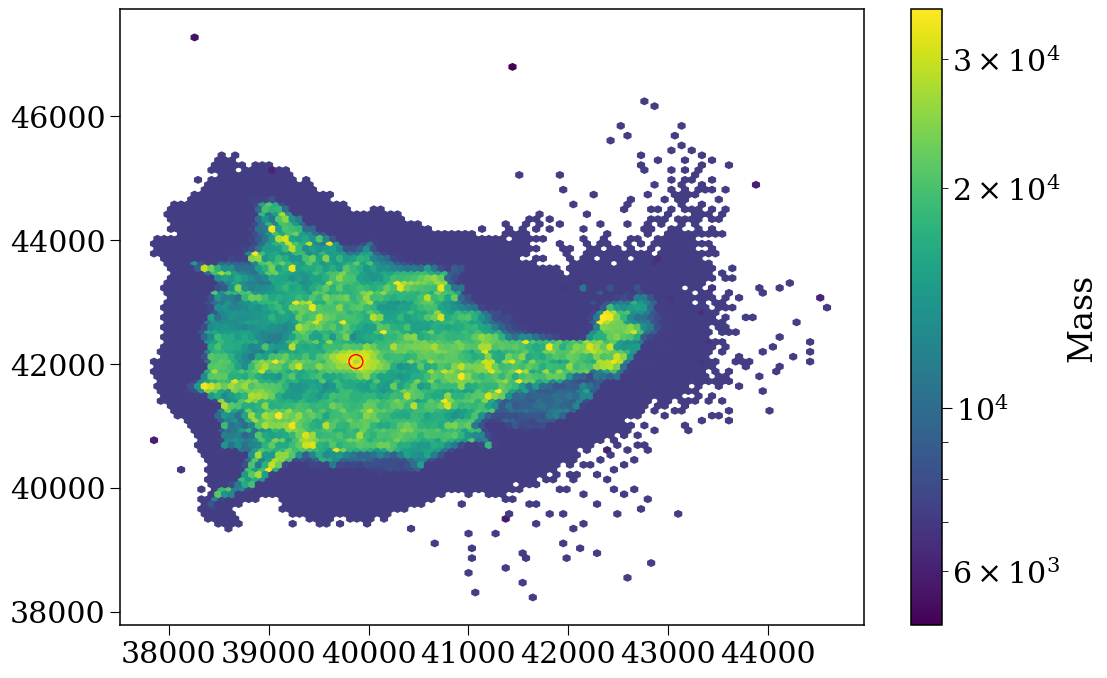

In [144]:
hexbin = plt.hexbin(snap["x"], snap["y"], C=snap["mass"], bins="log")
plt.colorbar(hexbin, label="Mass")
plt.scatter(*pynbody.analysis.halo.center(snap, method="scc", vel=False, retcen=True)[:2], s=100, edgecolor="red", facecolor="none")

In [38]:
try:
    h = snap.halos()
except RuntimeError:
    print("No can do")

No can do


In [6]:
pynbody.analysis.halo.center(snap, method="scc")

/home/tom/miniconda3/envs/cogsworth/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:394: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


In [18]:
my_snap_class.x

<Quantity [ 76.7073051 ,  11.52304122,  11.51373214, ..., -58.8055555 ,
           -64.53381528, -46.4277463 ] kpc>

In [147]:
face_on.revert()

In [161]:
my_snap_class.snap_p[:, 0]

<Quantity [-70.35990699, -10.23056334, -10.22241789, ...,  29.87766335,
            34.64151442,  23.18760773] kpc>

In [148]:
side_on.revert()

In [10]:
# make it side on and then face on to get rid of any angles
side_on = pynbody.analysis.angmom.sideon(snap, cen=(0,0,0))
face_on = pynbody.analysis.angmom.faceon(snap, cen=(0,0,0))

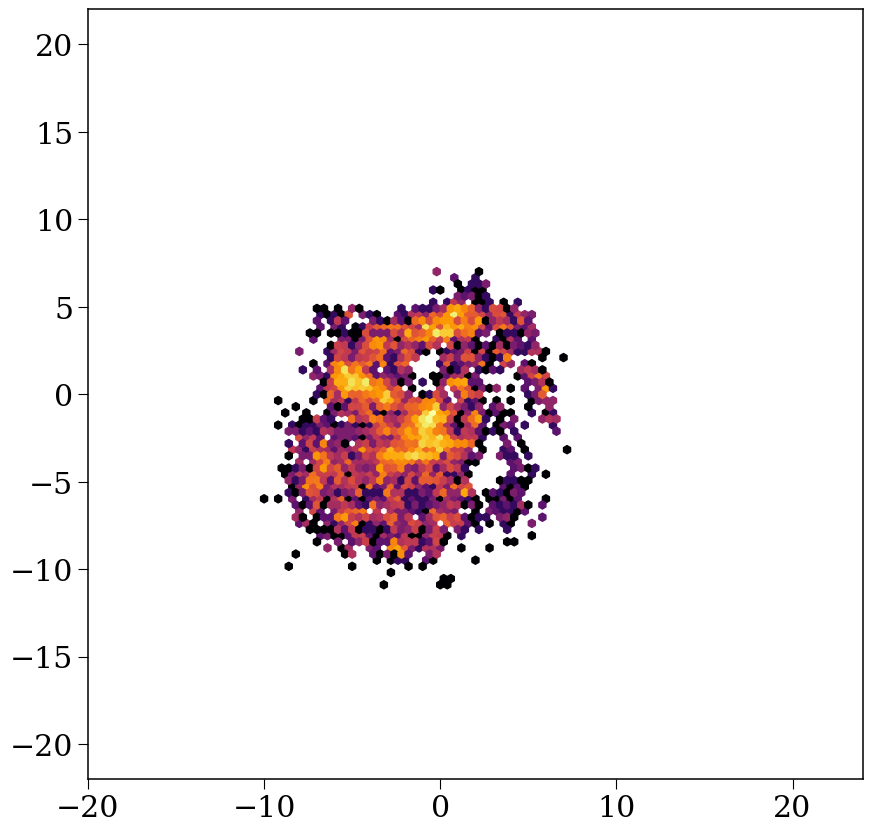

In [11]:
plt.figure(figsize=(10, 10))
plt.hexbin(snap.s["x"][my_snap_class.t_form_all > 13.6 * u.Gyr], snap.s["y"][my_snap_class.t_form_all > 13.6 * u.Gyr],
           extent=(-18, 22, -20, 20), gridsize=100, cmap="inferno", bins="log")

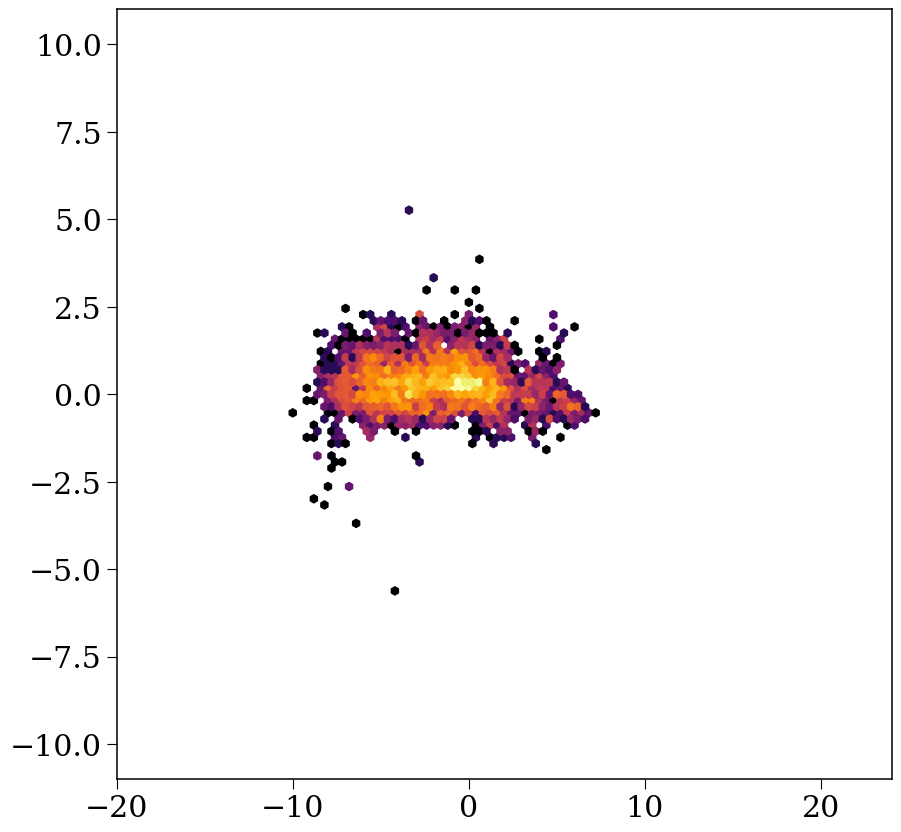

In [29]:
plt.figure(figsize=(10, 10))
plt.hexbin(snap.s["x"][my_snap_class.t_form_all > 13.6 * u.Gyr], snap.s["z"][my_snap_class.t_form_all > 13.6 * u.Gyr],
           extent=(-18, 22, -10, 10), gridsize=100, cmap="inferno", bins="log")

In [52]:
my_snap_class.min_t_form = 13.6 * u.Gyr
my_snap_class.apply_mask()

In [74]:
my_snap_class.t_form_all > 13.6 * u.Gyr

array([False,  True,  True, ..., False, False, False])

In [68]:
(snap.s["tform"].in_units("Gyr") > 13.6).sum()

SimArray(9349)

In [85]:
snap.s["x"]

SimArray([-61.02143947,  -6.50356275,  -6.49861787, ...,  58.43321493,
           61.73657636,  44.99283282], 'kpc')

In [86]:
len(snap.s["x"])

744667

In [83]:
my_snap_class.x

<Quantity [ 76.7073051 ,  11.52304122,  11.51373214, ..., -58.8055555 ,
           -64.53381528, -46.4277463 ] kpc>

In [18]:
my_snap_class.apply_mask()

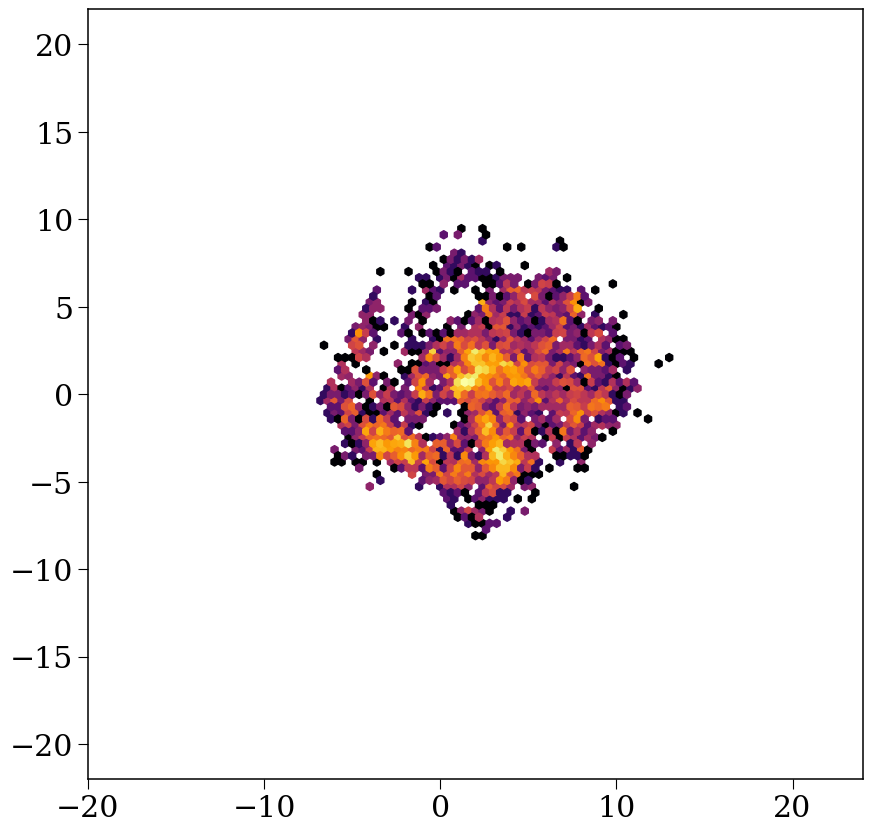

In [27]:
plt.figure(figsize=(10, 10))
plt.hexbin(my_snap_class.x, my_snap_class.y, extent=(-18, 22, -20, 20), gridsize=100, cmap="inferno", bins="log")
# plt.gca().set_ylim(reversed(plt.gca().get_ylim()))

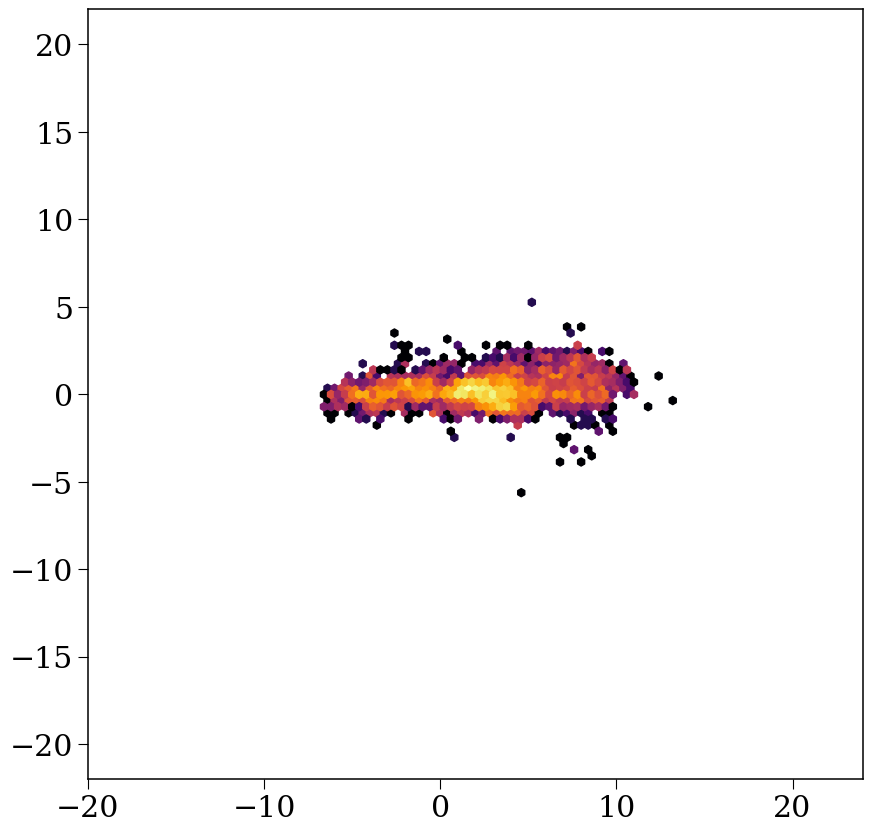

In [28]:
plt.figure(figsize=(10, 10))
plt.hexbin(my_snap_class.x, my_snap_class.z, extent=(-18, 22, -20, 20), gridsize=100, cmap="inferno", bins="log")
# plt.gca().set_ylim(reversed(plt.gca().get_ylim()))

In [39]:
from importlib import reload

In [40]:
reload(cogsworth)

<module 'cogsworth' from '/home/tom/Documents/research/cogsworth/cogsworth/__init__.py'>

In [34]:
pynbody.analysis.halo.center_of_mass(snap)

SimArray([40260.59852791, 40593.76628299, 42686.27314232], 'kpc')

In [85]:
len(my_snap_class)

15054933

In [86]:
snap.gas

<SimSnap "../../data/snapshot_600.hdf5::gas" len=15054933>